<a href="https://colab.research.google.com/github/Markohf/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diccionario

Aquí está el diccionario de datos para este conjunto de datos:

* Item_Identifier: ID único de producto
* Item_Weight:	Peso del producto
* Item_Fat_Content:	Si el producto es bajo en grasas o regular
* Item_Visibility:	El porcentaje del área de exhibición total de todos los productos en una tienda asignado al producto en particular
* Item_Type:	La categoría a la que pertenece el producto
* Item_MRP:	Precio minorista máximo (precio de lista) del producto
* Outlet_Identifier:	ID único de tienda
* Outlet_Establishment_Year:	El año en el que se estableció la tienda.
* Outlet_Size:	El tamaño de la tienda en términos de superficie cubierta
* Outlet_Location_Type:	El tipo de área en la que se encuentra la tienda
* Outlet_Type:	Si el punto de venta es una tienda de comestibles o algún tipo de supermercado
* Item_Outlet_Sales:	Ventas del producto en la tienda en particular. Ésta es la variable objetivo a predecir.

#Importar Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/Markohf/sales_predictions/main/sales_predictions.csv'
data_o = pd.read_csv(url)

#Limpiar Data

In [3]:
data_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Tenemos 2 variables incompletas:
* Item_Weight
* Outlet_Size

Completando Item_Weight

In [4]:
#Creamos un diccionario de cada Item con su Weight
gb_iw = data_o.groupby('Item_Identifier')[['Item_Weight']].mean()
dic_iw = dict(zip(gb_iw.index,gb_iw.values))

In [5]:
gb_iw.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [6]:
data1 = data_o

In [7]:
for x in data1.index:
  if data1.loc[x,'Item_Weight'] != np.nan:
    for a in dic_iw.keys():
      if data1.loc[x,'Item_Identifier'] == a:
        data1.loc[x,'Item_Weight'] = dic_iw[a]

In [8]:
data1.loc[data1['Item_Weight'].isna()]
#estos 4 items aparecen una unica vez en la data y no hay forma de conocer su peso asi que los vamos a quitar

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [9]:
data1 = data1.drop(index = [927,1922,4187,5022])

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Completando Outlet_Size

In [11]:
data2 = data1

In [12]:
data2['Outlet_Size'].value_counts()

Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [13]:
dic_os = {'Small':1,'Medium':2,'High':3}

In [14]:
data2['Outlet_Size'] = data2['Outlet_Size'].map(dic_os)

In [15]:
data2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,3.0,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,2.0,Tier 3,Supermarket Type2,1845.5976


In [16]:
#Creamos un diccionario de cada Oulet con su Size
gb_os = data2.groupby(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Size'],dropna=False)[['Item_Outlet_Sales']].sum()
gb_os

,,,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size,
OUT010,1998,Tier 3,Grocery Store,NaN,1.883402e+05
OUT013,1987,Tier 3,Supermarket Type1,3.0,2.142664e+06
OUT017,2007,Tier 2,Supermarket Type1,NaN,2.167465e+06
OUT018,2009,Tier 3,Supermarket Type2,2.0,1.851823e+06
OUT019,1985,Tier 1,Grocery Store,1.0,1.795736e+05
OUT027,1985,Tier 3,Supermarket Type3,2.0,3.444468e+06
OUT035,2004,Tier 2,Supermarket Type1,1.0,2.268123e+06
OUT045,2002,Tier 2,Supermarket Type1,NaN,2.036725e+06
OUT046,1997,Tier 1,Supermarket Type1,1.0,2.118395e+06


In [17]:
gb_os = data2.groupby(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type'],dropna=True)[['Outlet_Size']].mean()
gb_os

,,,,Outlet_Size
Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,
OUT010,1998,Tier 3,Grocery Store,NaN
OUT013,1987,Tier 3,Supermarket Type1,3.0
OUT017,2007,Tier 2,Supermarket Type1,NaN
OUT018,2009,Tier 3,Supermarket Type2,2.0
OUT019,1985,Tier 1,Grocery Store,1.0
OUT027,1985,Tier 3,Supermarket Type3,2.0
OUT035,2004,Tier 2,Supermarket Type1,1.0
OUT045,2002,Tier 2,Supermarket Type1,NaN
OUT046,1997,Tier 1,Supermarket Type1,1.0


In [18]:
gb_os['Outlet_Size'].mean()

1.7142857142857142

No hay forma de poder obetener los datos faltantes de Outlet_Size. A los datos faltantes le pondremos un promedio de los tamanos. Si bien los tamanos eran una variable categorica, ahora es numera. Luego al momento de entrenar el modelo probaremos incluyendo y no esta columna ya que podria ser que esta columna no afecte mucho.

In [19]:
data2['Outlet_Size'] = data2['Outlet_Size'].fillna(1.71)

In [20]:
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.00,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.00,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.00,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.71,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.00,Tier 3,Supermarket Type1,994.7052


In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   float64
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 865.2+ KB


In [22]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8519.0,12.875420,4.646098,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8519.0,0.066112,0.051586,0.000,0.026983,0.053925,0.094558,0.328391
Item_MRP,8519.0,141.010019,62.283594,31.290,93.844900,143.047000,185.676600,266.888400
Outlet_Establishment_Year,8519.0,1997.837892,8.369105,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8519.0,1.747165,0.591191,1.000,1.000000,1.710000,2.000000,3.000000
Item_Outlet_Sales,8519.0,2181.188779,1706.511093,33.290,834.247400,1794.331000,3100.630600,13086.964800


In [23]:
data2.duplicated().sum()

0

#Cambiamos datos categoricos

In [24]:
data3 = data2

In [25]:
data3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.00,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.00,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.00,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.71,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.00,Tier 3,Supermarket Type1,994.7052


In [26]:
data3['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
dic_ifc = {'Low Fat':1,'LF':1,'low fat':1,'Regular':2,'reg':2}

In [28]:
data3['Item_Fat_Content'] = data3['Item_Fat_Content'].map(dic_ifc)

In [29]:
data3['Outlet_Location_Type'].value_counts()

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

In [30]:
dic_olt = {'Tier 1':1,'Tier 2':2,'Tier 3':3}

In [31]:
data3['Outlet_Location_Type'] = data3['Outlet_Location_Type'].map(dic_olt)

In [32]:
data3['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [33]:
dic_ot = {'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}

In [34]:
data3['Outlet_Type'] = data3['Outlet_Type'].map(dic_ot)

In [35]:
data3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2.00,1,1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2.00,3,2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2.00,1,1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.71,3,0,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3.00,3,1,994.7052


#Analizar Data

In [36]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   int64  
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   float64
 9   Outlet_Location_Type       8519 non-null   int64  
 10  Outlet_Type                8519 non-null   int64  
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 865.2+ KB


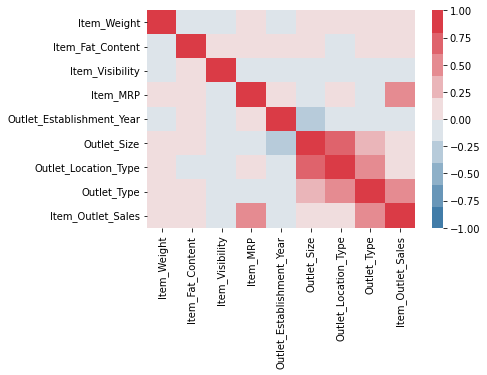

In [37]:
sns.heatmap(data2.corr(), cmap = sns.diverging_palette(240, 10, n=10),vmin=-1, vmax=1)

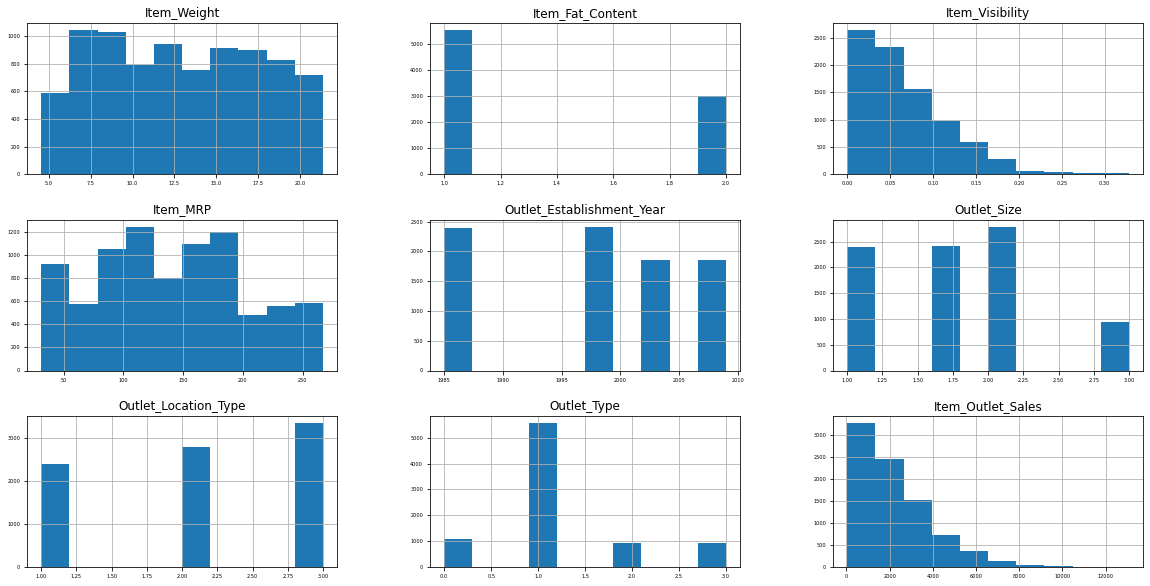

In [38]:
data3.loc[:,:].hist(bins=10,
                    figsize=(20,10),
                    xlabelsize='5',
                    ylabelsize='5');

In [39]:
y = data3['Item_Outlet_Sales']

In [40]:
col = data3.columns.values
col1 = col[0:6]
col2 = col[6:12]

In [41]:
#Revisar este codigo
#fig, axes = plt.subplots(nrows = 1,ncols = 6,figsize = (10,2), dpi=1000)
#a=0
#for x in col1:
  #sns.regplot(x, y, data=data3, ci=None, ax = axes[a], scatter_kws={'alpha':0.3});
  #a = a + 1
#fig.tight_layout()

#Pre_Modelo

Terminamos de ordenar los datos categoricos antes de ingresarlos al modelo

In [42]:
data4 = data3

In [43]:
data4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2.00,1,1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2.00,3,2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2.00,1,1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.71,3,0,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3.00,3,1,994.7052


In [44]:
olt_ = data4['Outlet_Location_Type']
olt_ = pd.get_dummies(olt_,prefix='Outlet_Location_Type')
olt_

,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Location_Type_3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
8518,0,0,1
8519,0,1,0
8520,0,1,0
8521,0,0,1


In [45]:
ot_ = data4['Outlet_Type']
ot_ = pd.get_dummies(ot_,prefix='Outlet_Type')
ot_

,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [46]:
data4 = data4.drop(columns = ['Outlet_Location_Type','Outlet_Type'])
data4 = pd.concat([data4,olt_,ot_],axis = 1)

#Modelos

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
data5 = data4

In [49]:
data5.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2.00,3735.1380,1,0,0,0,1,0,0
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2.00,443.4228,0,0,1,0,0,1,0
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2.00,2097.2700,1,0,0,0,1,0,0
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.71,732.3800,0,0,1,1,0,0,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3.00,994.7052,0,0,1,0,1,0,0


In [50]:
X1 = data5.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier','Item_Outlet_Sales'])
X1 = X1.values
y = data5['Item_Outlet_Sales']

In [51]:
#split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=3)

In [52]:
#escalar
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train_sc = scaler.transform(X1_train)
X1_test_sc = scaler.transform(X1_test)

###Regresion lineal

In [53]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X1_train_sc,y_train)
score = reg.score(X1_test_sc, y_test)
print(score)

0.5689996305172895


###KNN Regresion

In [54]:
error = []
for k in range (10,40):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X1_train_sc,y_train)
  error.append(knn.score(X1_test_sc, y_test))

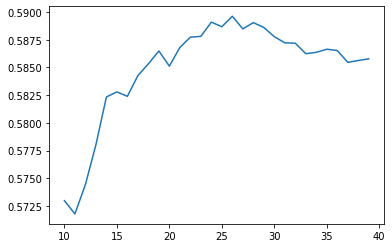

In [55]:
plt.plot(range(10,40),error)

In [59]:
for k in range (20,30):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X1_train_sc,y_train)
  print(k,knn.score(X1_test_sc, y_test))

20 0.5851214213177884
21 0.5868113598540212
22 0.587735070246233
23 0.587812726312736
24 0.5890947992295402
25 0.5886817913421764
26 0.5896269847300302
27 0.588484859590314
28 0.5890518384414685
29 0.5886126899651858


el mejor K es 26 pero aun asi es bajo

#Conclusion

No se obtuvieron buenos datos con los modelos vistos hasta ahora por lo que se necesitarian u otros modelos o nuevas variables que ayuden a los modelos vistos mejorar sus scores.